In [10]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
from ExperienceReplayBuffer import ExperienceReplayBuffer
import tqdm

In [11]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [12]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

# 相对于之前是增加了ExperienceReplayBuffer


In [13]:
experiencePool = ExperienceReplayBuffer(max_size=10000)
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]
for trajectory in episodes:
    for exp in trajectory:#一个exp就代表states,action,reward,next_state,next_action,terminal
        experiencePool.add_expericence(exp)

In [14]:
experiencePool.getSize()

10000

In [15]:
state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99
batch_size = 500

  0%|          | 0/1000 [00:00<?, ?it/s]

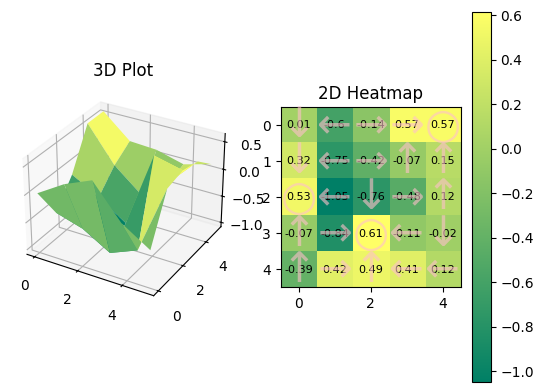

  0%|          | 1/1000 [00:00<02:50,  5.85it/s]

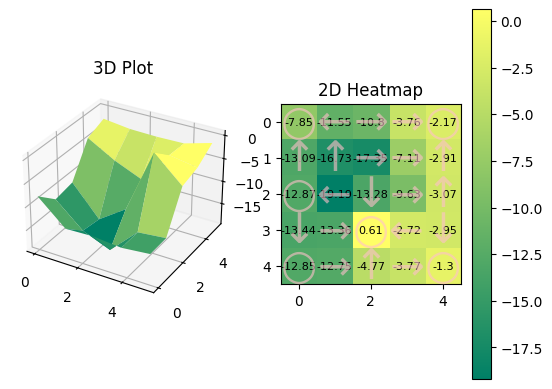

  2%|▏         | 21/1000 [00:00<00:13, 71.58it/s]

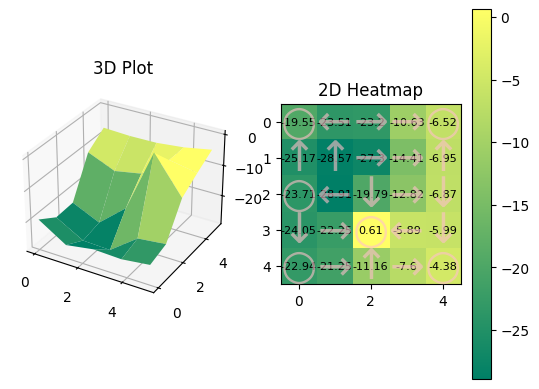

  4%|▍         | 41/1000 [00:00<00:10, 95.63it/s]

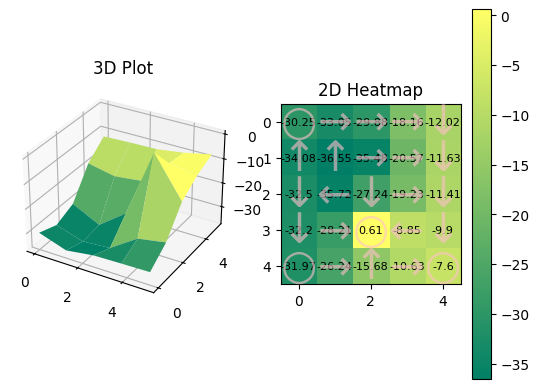

  6%|▌         | 61/1000 [00:00<00:08, 105.10it/s]

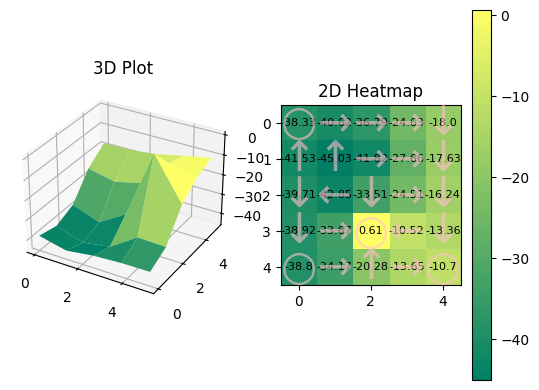

  8%|▊         | 81/1000 [00:00<00:08, 110.20it/s]

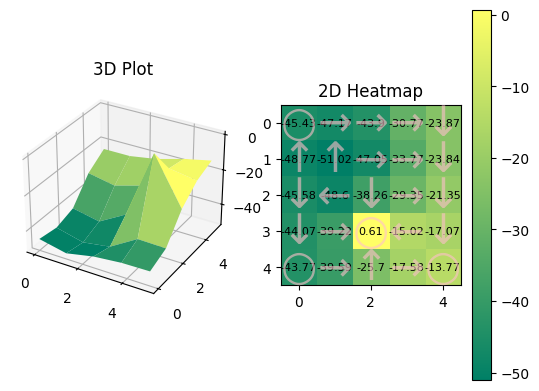

 10%|█         | 101/1000 [00:00<00:07, 115.29it/s]

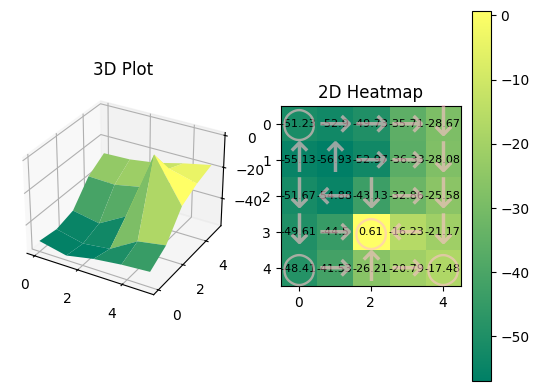

 12%|█▏        | 121/1000 [00:01<00:08, 102.20it/s]

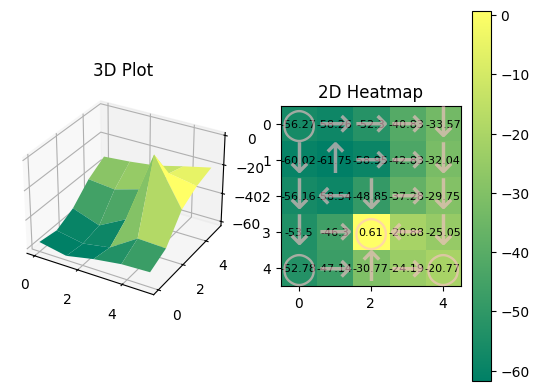

 14%|█▍        | 141/1000 [00:01<00:08, 106.82it/s]

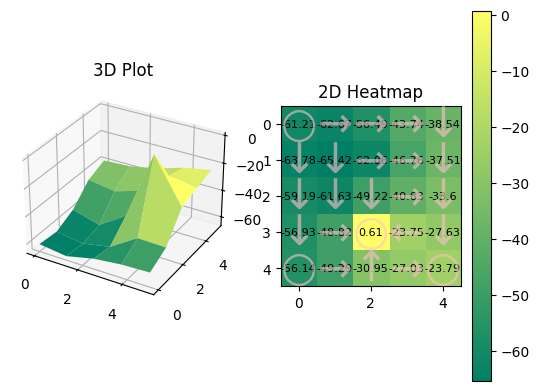

 16%|█▌        | 161/1000 [00:01<00:08, 103.42it/s]

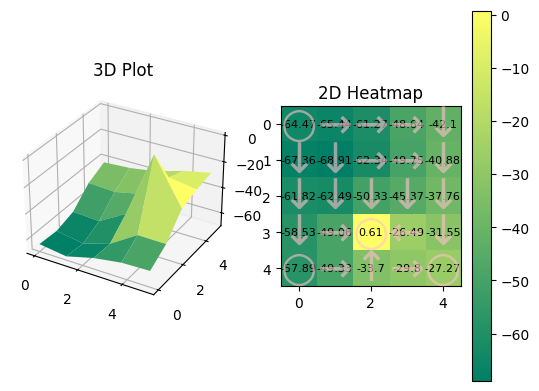

 18%|█▊        | 181/1000 [00:01<00:07, 108.00it/s]

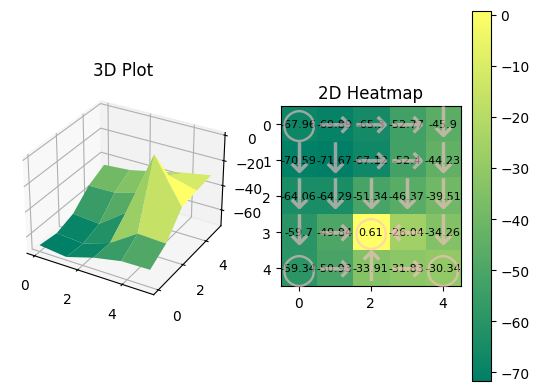

 20%|██        | 201/1000 [00:01<00:07, 111.64it/s]

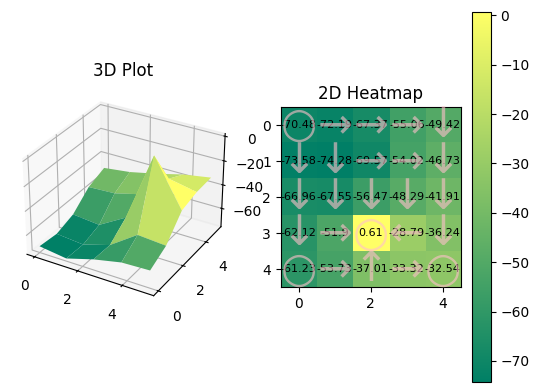

 22%|██▏       | 221/1000 [00:02<00:06, 113.09it/s]

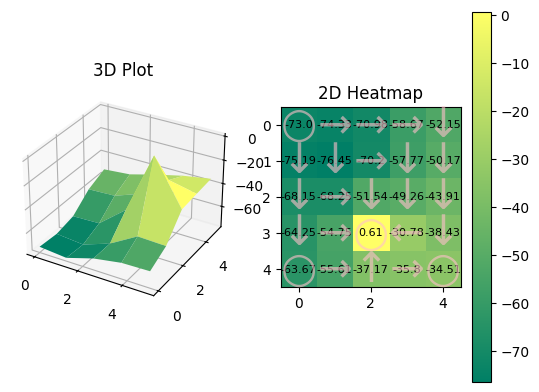

 24%|██▍       | 241/1000 [00:02<00:07, 97.78it/s] 

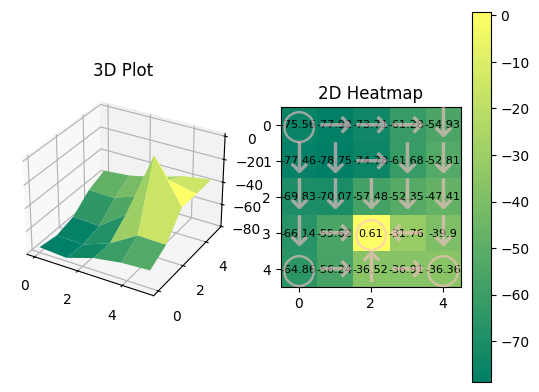

 26%|██▌       | 261/1000 [00:02<00:07, 101.73it/s]

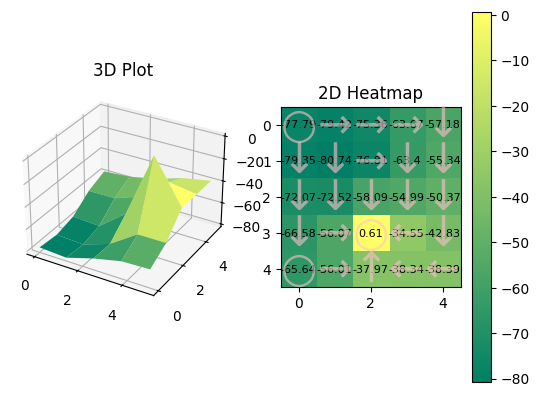

 28%|██▊       | 281/1000 [00:02<00:06, 104.79it/s]

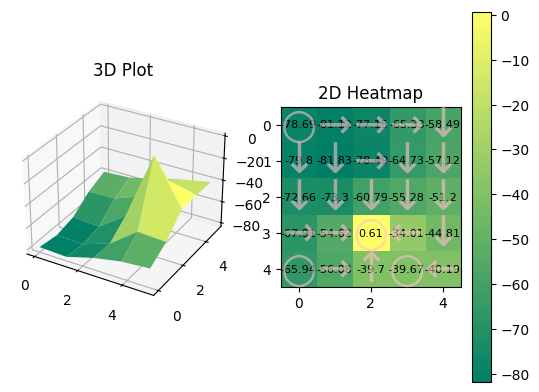

 30%|███       | 301/1000 [00:02<00:06, 108.32it/s]

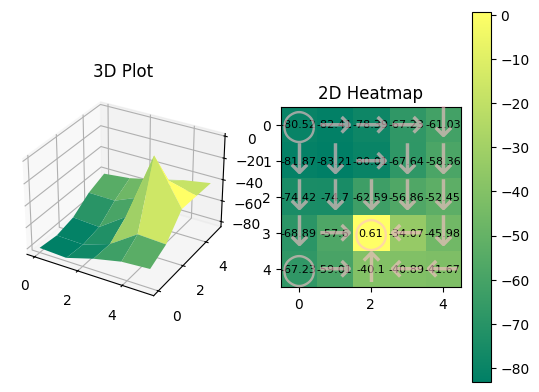

 32%|███▏      | 321/1000 [00:03<00:06, 110.45it/s]

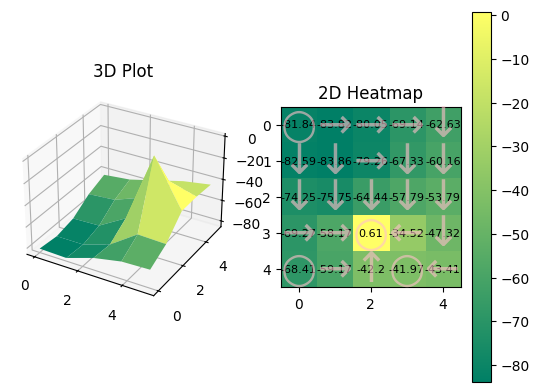

 34%|███▍      | 341/1000 [00:03<00:06, 109.15it/s]

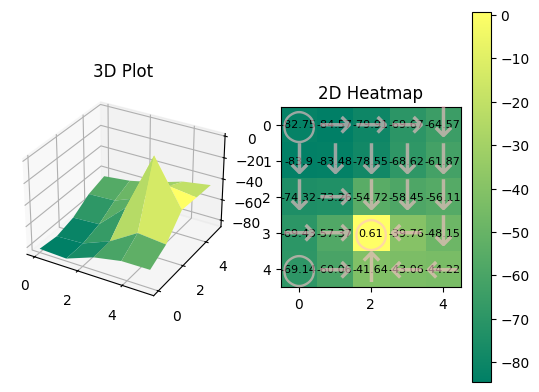

 36%|███▌      | 361/1000 [00:03<00:05, 110.76it/s]

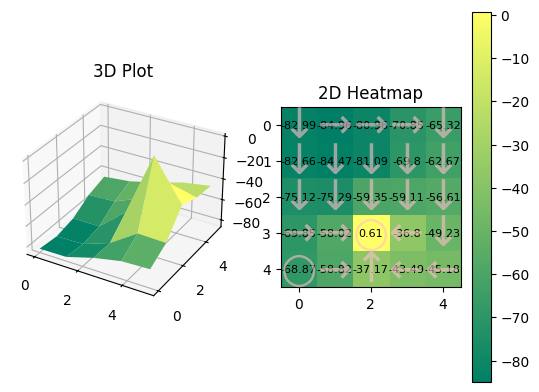

 38%|███▊      | 381/1000 [00:03<00:06, 94.99it/s] 

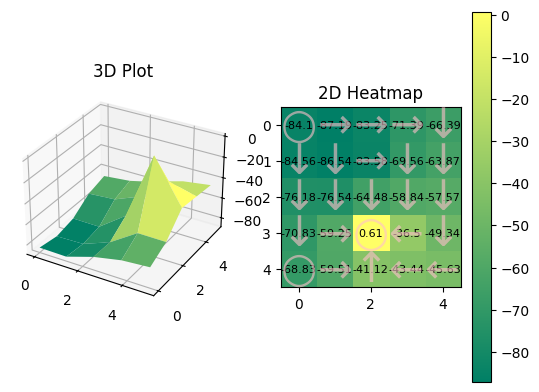

 40%|████      | 401/1000 [00:03<00:06, 99.76it/s]

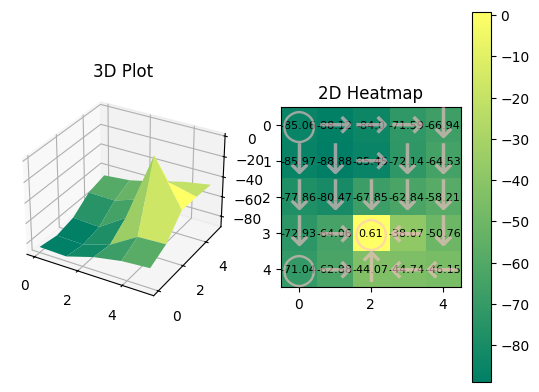

 42%|████▏     | 421/1000 [00:04<00:05, 103.50it/s]

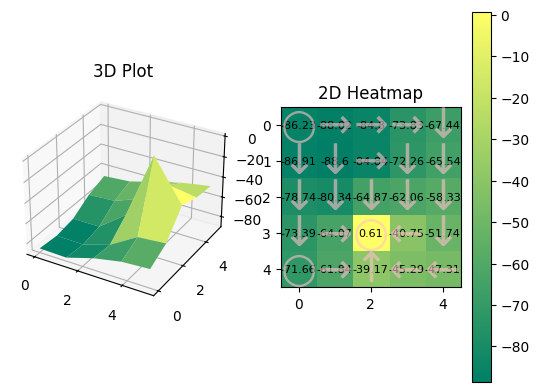

 44%|████▍     | 441/1000 [00:04<00:05, 102.39it/s]

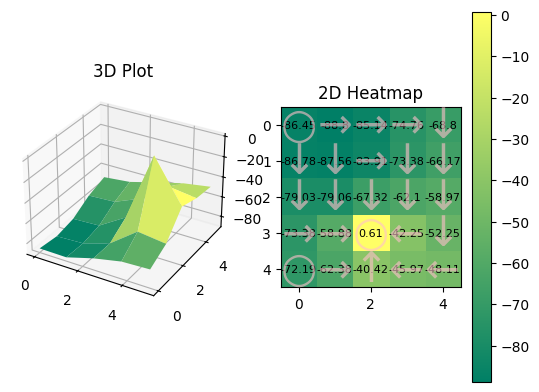

 46%|████▌     | 461/1000 [00:04<00:05, 106.07it/s]

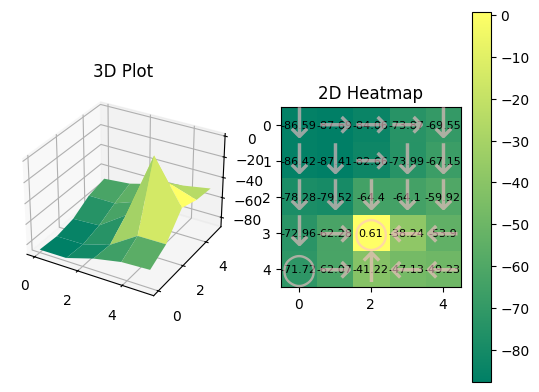

 48%|████▊     | 481/1000 [00:04<00:04, 109.45it/s]

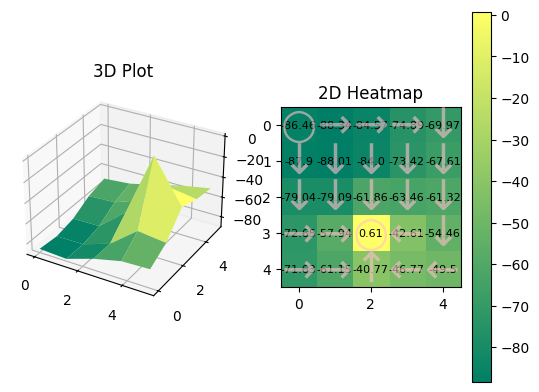

 50%|█████     | 501/1000 [00:04<00:05, 98.27it/s] 

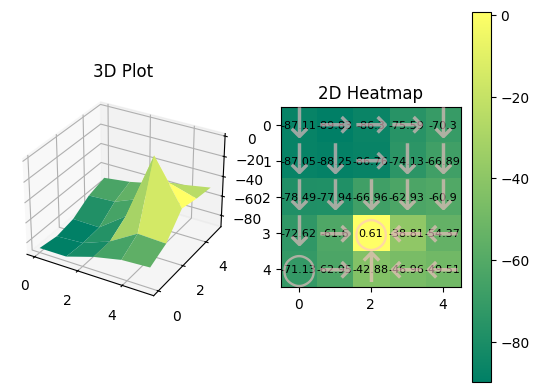

 52%|█████▏    | 521/1000 [00:05<00:04, 104.46it/s]

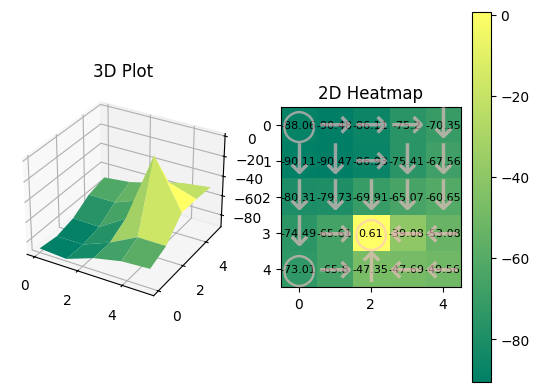

 54%|█████▍    | 541/1000 [00:05<00:04, 104.79it/s]

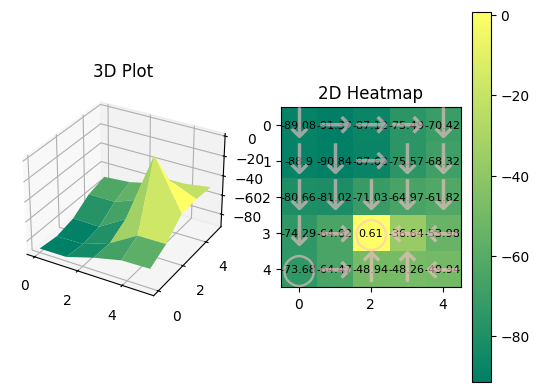

 56%|█████▌    | 561/1000 [00:05<00:04, 108.32it/s]

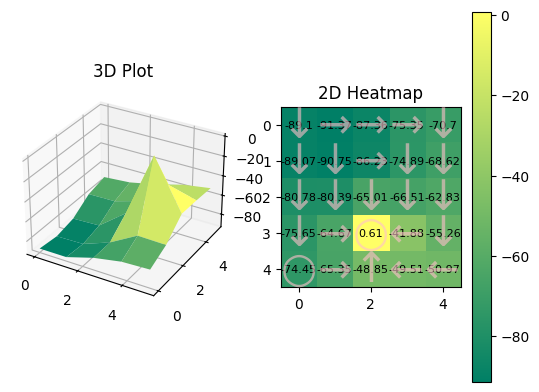

 58%|█████▊    | 581/1000 [00:05<00:03, 111.63it/s]

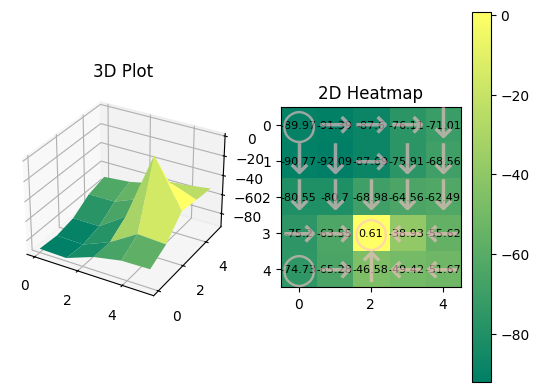

 60%|██████    | 601/1000 [00:05<00:03, 114.83it/s]

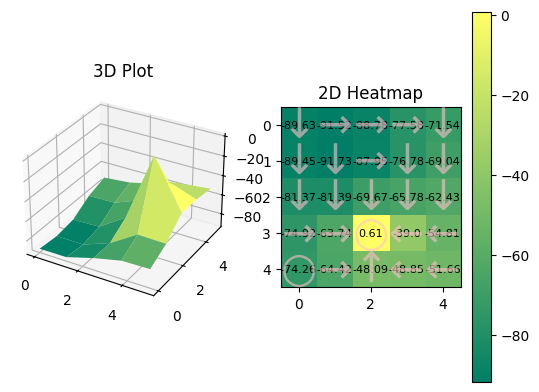

 62%|██████▏   | 621/1000 [00:05<00:03, 112.40it/s]

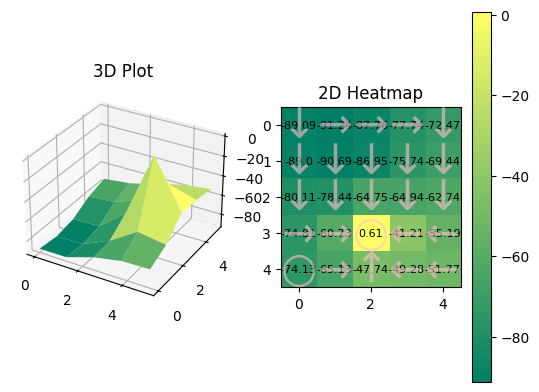

 64%|██████▍   | 641/1000 [00:06<00:03, 100.26it/s]

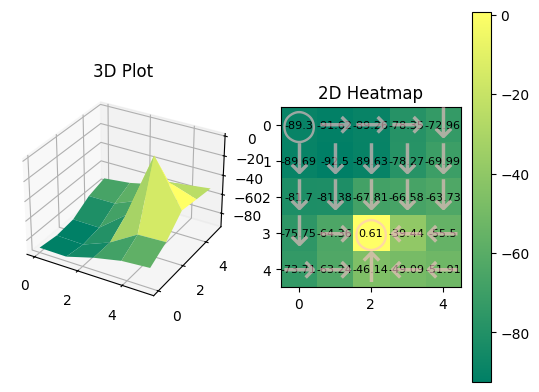

 66%|██████▌   | 661/1000 [00:06<00:03, 105.66it/s]

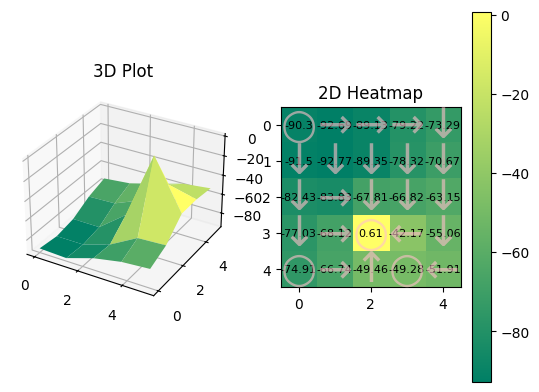

 68%|██████▊   | 681/1000 [00:06<00:02, 109.95it/s]

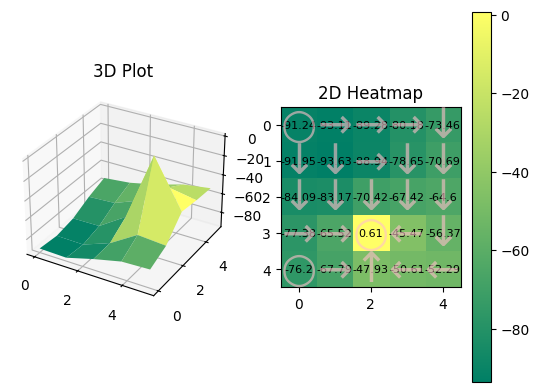

 70%|███████   | 701/1000 [00:06<00:02, 109.07it/s]

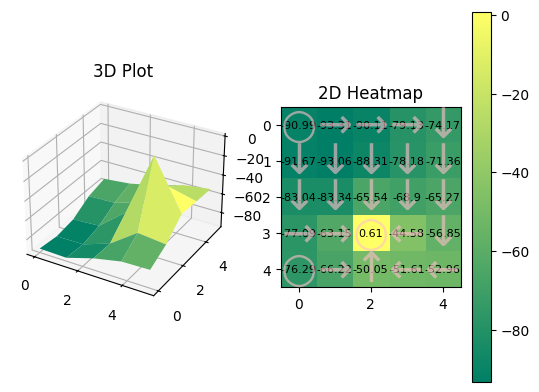

 72%|███████▏  | 721/1000 [00:06<00:02, 112.34it/s]

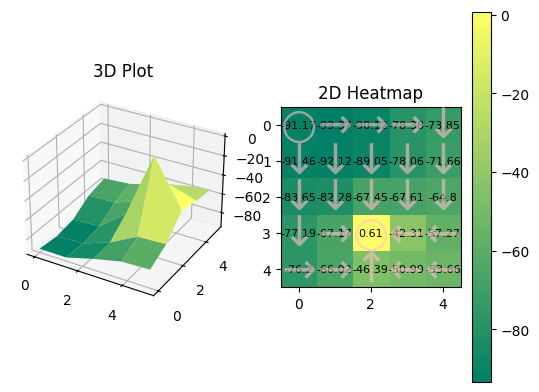

 74%|███████▍  | 741/1000 [00:07<00:02, 114.26it/s]

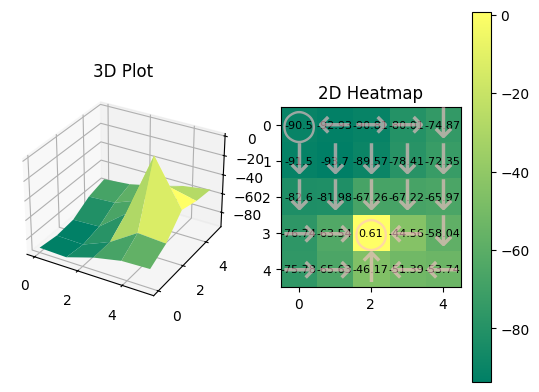

 76%|███████▌  | 761/1000 [00:07<00:02, 116.25it/s]

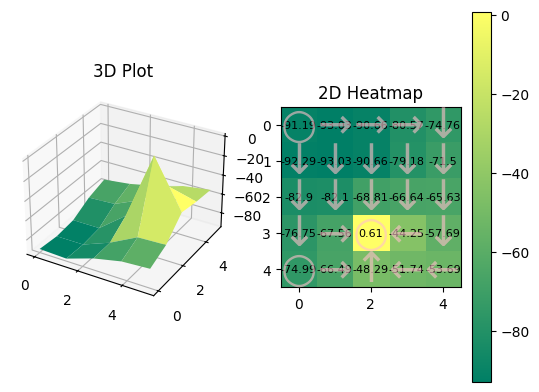

 78%|███████▊  | 781/1000 [00:07<00:02, 96.45it/s] 

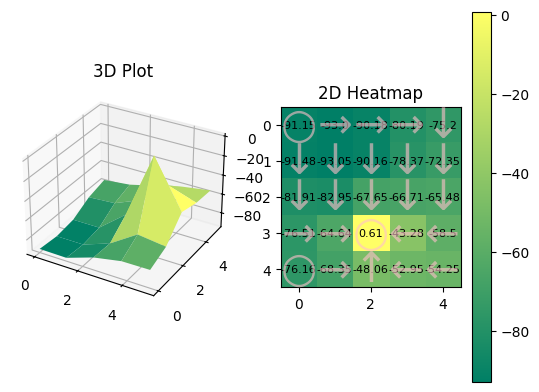

 80%|████████  | 801/1000 [00:07<00:01, 103.41it/s]

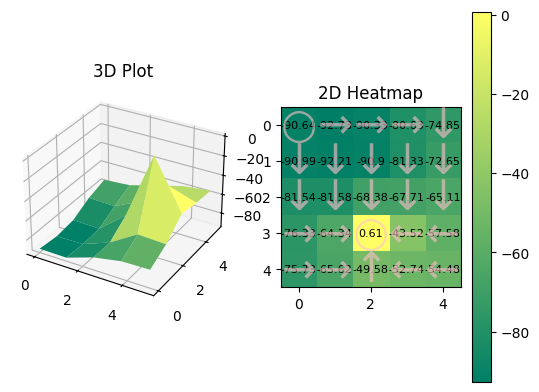

 82%|████████▏ | 821/1000 [00:07<00:01, 103.41it/s]

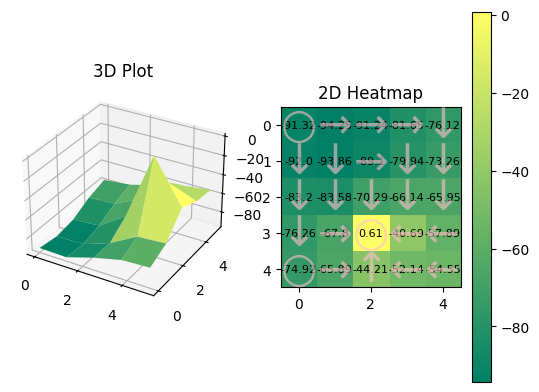

 84%|████████▍ | 841/1000 [00:07<00:01, 108.26it/s]

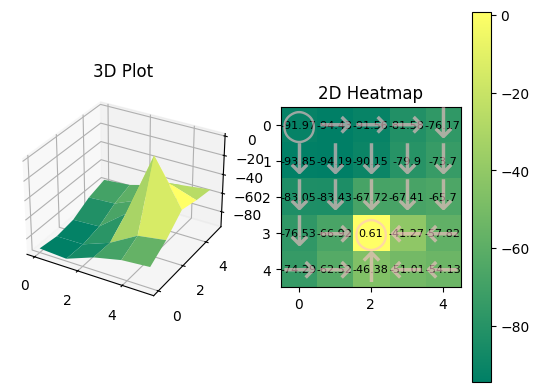

 86%|████████▌ | 861/1000 [00:08<00:01, 111.75it/s]

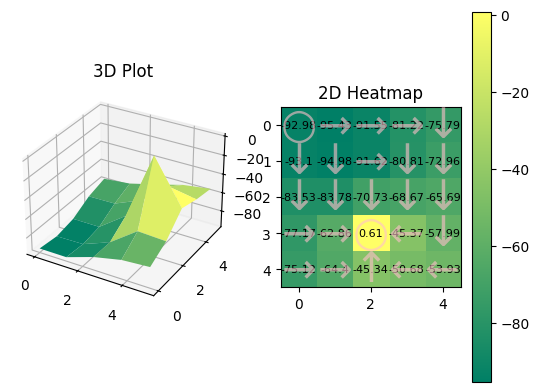

 88%|████████▊ | 881/1000 [00:08<00:01, 113.47it/s]

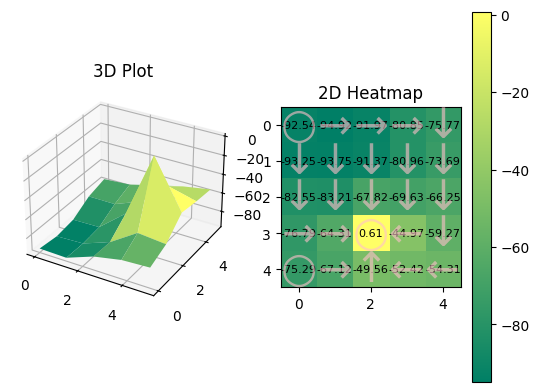

 90%|█████████ | 901/1000 [00:08<00:00, 110.17it/s]

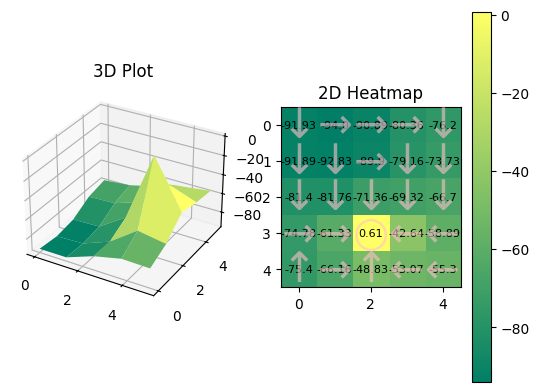

 92%|█████████▏| 921/1000 [00:08<00:00, 98.72it/s] 

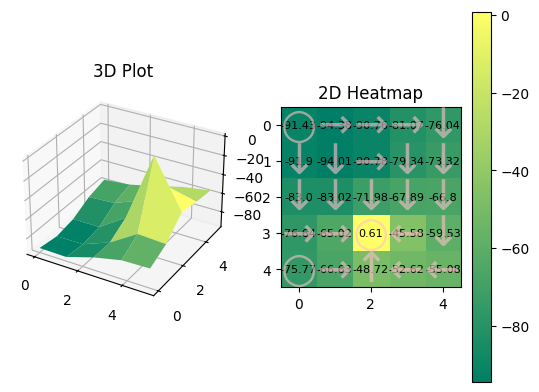

 94%|█████████▍| 941/1000 [00:08<00:00, 104.47it/s]

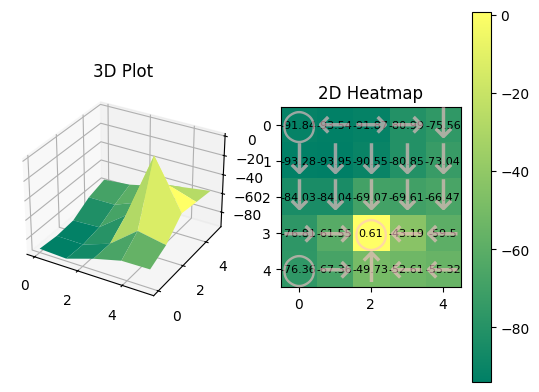

 96%|█████████▌| 961/1000 [00:09<00:00, 105.17it/s]

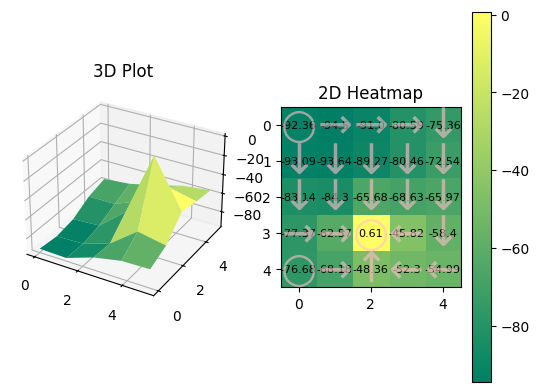

100%|██████████| 1000/1000 [00:09<00:00, 107.59it/s]


In [16]:
# 遍历1000次，使用tqdm库显示进度条
for _ in tqdm.tqdm(range(1000)):
    # 从经验池experiencePool中采样一批经验数据，批次大小为batch_size
    exps = experiencePool.sample_exps(batch_size=batch_size)
    # 遍历采样得到的每一条经验轨迹
    for trajectory in exps:
        # 解包经验轨迹，获取当前状态、动作、得分、下一个状态、下一个动作和终止标志
        tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
        # 获取下一个状态的值
        next_state_value = state_values[nextState]
        # 根据贝尔曼方程计算目标值
        target = tmpscore + (1.0 - terminal) * gamma * next_state_value

        # 计算时间差分（TD）误差
        TD_error = state_values[tmpstate] - target
        # 根据TD误差更新当前状态的值
        state_values[tmpstate] -= learning_rate * TD_error
    # 每20次迭代执行一次以下操作
    if _ % 20 == 0:
        # 随机初始化动作值函数，形状为(25, 5)
        action_values = np.random.rand(25,5)
        # 遍历所有状态和动作
        for i in range(25):
            for j in range(5):
                # 从网格世界环境gridworld中获取执行动作(i, j)的得分和下一个状态
                score, nextState = gridworld.getScore(i,j)
                # 根据贝尔曼方程更新动作值函数
                action_values[i][j] = score + gamma * state_values[nextState]
        
        # 找出每个状态下的最优动作
        p = np.argmax(action_values,axis=1)
        # 绘制状态值函数和最优动作策略
        draw(state_values.reshape(5,5), p)

In [17]:
import random
data = [1, 2, 3, 4, 5]
# 抽取3个元素（允许重复）
result = random.choices(data, k=3)  # 可能输出：[2, 2, 5]
result

[4, 5, 5]

In [18]:
result = random.sample(data, k=3)  # 保证结果无重复
result

[3, 5, 1]